Student:

Date:

__Run the following blocks__

In [1]:
from spatialmath.base  import *
import roboticstoolbox as rtb
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
%matplotlib notebook

In [3]:
def runanim(p): #Funcion de animacion de robot movil
  fig = plt.figure()
  ax = plt.axes(xlim=(p[:,0].min()-1, p[:,0].max()+1), ylim=(p[:,1].min()-1, p[:,1].max()+1))
  particles, = ax.plot([], [], 'bo', ms=6)
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  time_text = ax.text(0.75, 0.95, 'time =', transform=ax.transAxes,bbox=props)
  time_text = ax.text(0.92, 0.95, 's', transform=ax.transAxes,bbox=props)
  time_text = ax.text(0.85, 0.95, '', transform=ax.transAxes,bbox=props)


  def init():
      particles.set_data([], [])
      time_text.set_text('')
      return particles,
  # animation function.  This is called sequentially
  def animate(i):
      x = p[:,0][i]
      y = p[:,1][i]
      particles.set_data(x, y)
      time_text.set_text(str((i+1)/10))
      return particles,time_text
    
  return fig,animate,init

# Spatial Math 

This section is done following the document

# Robotics Toolbox

In this section you work following the jupyter notebook.
__Run the blocks as you read__

## __The Bicycle Model__

As mentioned in class:

$$
\begin{pmatrix}
\dot{x}\\
\dot{y}\\
\dot{θ}
\end{pmatrix}
 = \begin{pmatrix}
vcos(θ) \\
vsin(θ) \\
\dfrac{vtan(γ)}{L}
\end{pmatrix}
$$

It lets to follow the model of a Bicycle.
<br> Where 
<br>__v__ is the linear velocity 
<br>__&#947;__ is the stering angle
<br>__L__ is the wheel base length
<br>__θ__ the angle of orientation of the bicycle  </br>

<br>Robotics Toolbox let us to control these parameters</br>
<br>But first to simulate a model of bicycle __(L,v,γ)__ are required</br>

Start the simulation

In [205]:
a = rtb.VehiclePolygon('car', color='r') #Default
veh = rtb.Bicycle(animation=a,L=2) #L is the wheel base lenght
veh.control = (3,15*np.pi/180) # 3 m/s is the linear velocity and  15 degrees in radians is the steering angle
for i in range(150): #The number 150 controls the time, divide it by 10 and it is the seconds the animation will run
  veh.step()
p = np.array(veh.x_hist) #Variable p, contains the trayectory of the vehicle

Animate the simulation

<IPython.core.display.Javascript object>


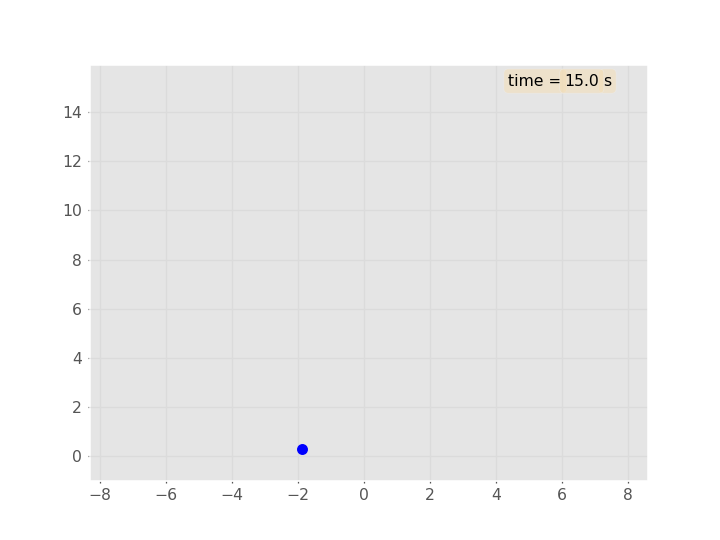

In [206]:
# The animation will work with matplotlib
# The most important variable here is p, because it contains the trayectory of our vehicle
# This code is the same for all simulations, you don't need to memorize it, just know variable p is important

fig, animate, init = runanim(p)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(p)+20, interval=100, blit=False)

This movement is expected when the steering angle remains constant

## __Global Reference Frame__

__But RTB-Python can also estimate the pose of the robot for the global reference frame as the examples done in class__

Remember the equation

$$ \normalsize
\dot{ξ}_I = R(θ)^{-1}\dot{ξ}_R
$$

Follow the next steps

__1.__  What is our interest position? Define one
<br> Lets work with the simulation done above </br>
<br> Therefore we have the following information </br>

  

| <font size="4">Variable </font>       |<font size="4">Value </font>  |
| ----------- | ----------- |
| <font size="3">L (m) </font>     | <font size="3">2 </font>        |
| <font size="3">v (m/s)</font>    | <font size="3"> 3 </font>         |
| <font size="3">&#947;(*) </font>    | <font size="3">15 </font>         |


Consider the trayectory stored in the variable __p__ </br>
<br> Lets see what information the variable __p__  has </br>
<br> Lets print the first 10 rows </br>

In [207]:
p[:10]

array([[0.3       , 0.        , 0.04019238],
       [0.59975772, 0.01205447, 0.08038476],
       [0.89878898, 0.03614393, 0.12057714],
       [1.1966108 , 0.07222948, 0.16076952],
       [1.49274212, 0.12025284, 0.20096189],
       [1.78670462, 0.18013643, 0.24115427],
       [2.07802351, 0.25178352, 0.28134665],
       [2.36622823, 0.3350784 , 0.32153903],
       [2.65085328, 0.42988653, 0.36173141],
       [2.93143893, 0.53605477, 0.40192379]])

The information the variable has is the position as [ x, y, angle in radians]
<br> In fact it can be obtained by __veh.x_hist function__ tiped above </br>
<br> The array is as large as the number you put in the range above </br>
<br> Lets choose any position </br>

In [208]:
pos = p[30]
pos

array([7.17493543, 4.93909286, 1.24596374])

In [209]:
#Remember the angle is in radians
deg = pos[2]*180/np.pi
deg

71.38846400362561

Plotting the selected position

<IPython.core.display.Javascript object>


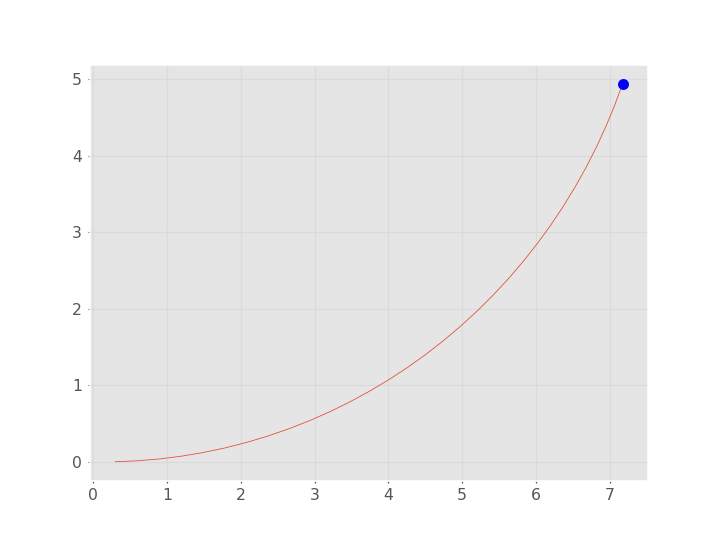

In [210]:
plt.plot(p[:31,0],p[:31,1])
plt.plot(pos[0],pos[1],"bo")

__2.__ To compute the pose we need to call another function

__veh.deriv__ function receives the position as [x,y,orientation angle] and the odometry [linear velocity, steering angle]

In [211]:
newpos = veh.deriv(pos, [3,15*np.pi/180])
newpos

array([0.95745038, 2.84311251, 0.40192379])

And it is the velocity the robot has at the __Global Reference Frame__

__3.__ To validate, we can use Spatial Math

$$
\normalsize
\dot{ξ}_I= \begin{pmatrix}
cos(θ) & -sin(θ) & 0\\
sen(θ) & cos(θ) & 0\\
0 & 0 & 1
\end{pmatrix}\begin{pmatrix}
v\\
0\\
\dfrac{vtan(γ)}{L}
\end{pmatrix}
$$

In [212]:
T = rotz(deg, unit='deg') 
local = np.array([3,0,3*np.tan(15*np.pi/180)/2])
np.matmul(T,local)

array([0.95745038, 2.84311251, 0.40192379])

## __Velocities Graph__

The following code let us to compute the velocities at different instants of the trajectory

In [213]:
time = np.arange(0,len(p)/10,0.1)
velocs = []
for i in range(len(p)):
    veloz = veh.deriv(p[i], [3,15*np.pi/180]) #Put the same lineal and angular velocity you defined in control previously
    velocs.append(veloz)

__Velocity in x__

<IPython.core.display.Javascript object>


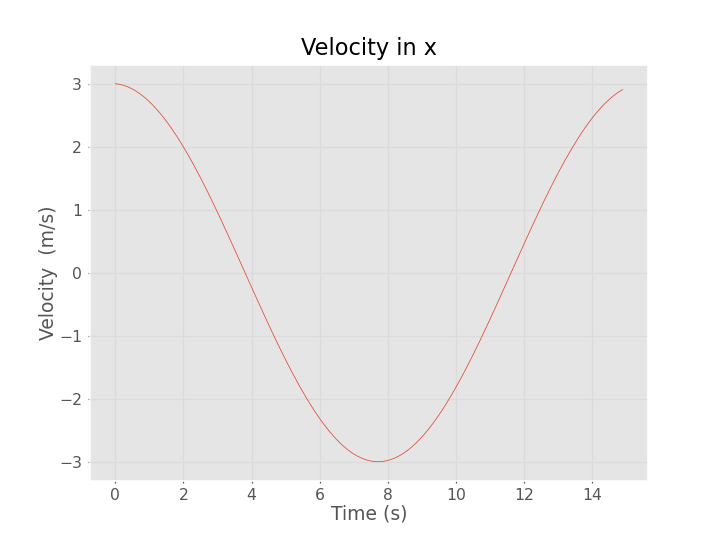

In [214]:
plt.title("Velocity in x")
plt.xlabel("Time (s)")
plt.ylabel("Velocity  (m/s)")
plt.plot(time,np.array(velocs)[:,0])

__Velocity in y__

<IPython.core.display.Javascript object>


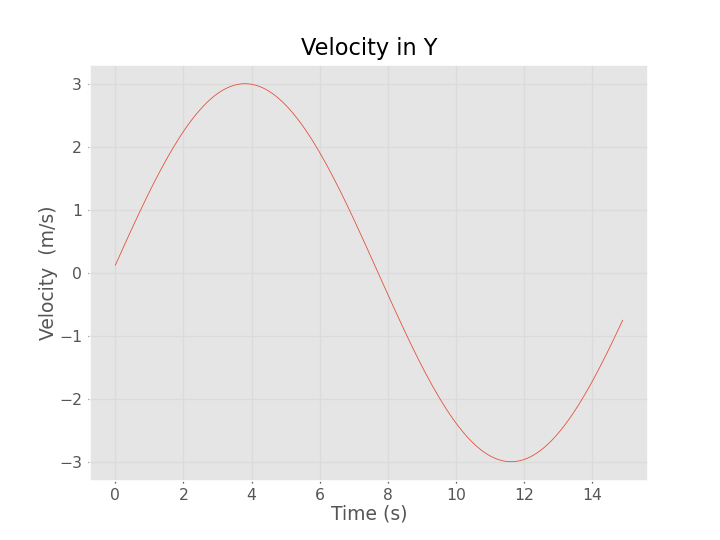

In [215]:
plt.title("Velocity in Y")
plt.xlabel("Time (s)")
plt.ylabel("Velocity  (m/s)")
plt.plot(time,np.array(velocs)[:,1])

As you can, the velocity behaviour is sinusoidal, it makes sense since its definition has trigonometric functions

__Orientation Angle__

<IPython.core.display.Javascript object>


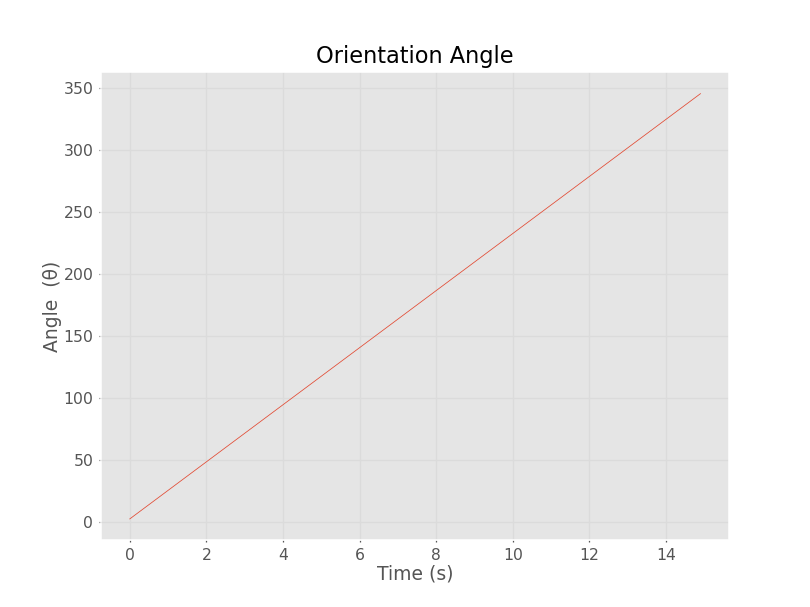

In [216]:
plt.title("Orientation Angle")
plt.xlabel("Time (s)")
plt.ylabel("Angle  (θ)")
plt.plot(time,p[:,2]*180/np.pi) 

As you can see, the orientation angle is always increasing. 
<br> It makes sense since the bicycle keeps rotating following a circular path

__Angular Velocity__

<IPython.core.display.Javascript object>


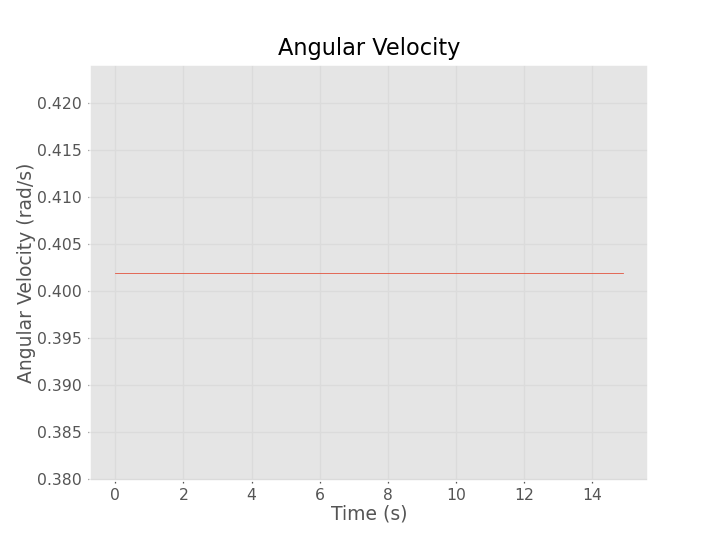

In [217]:
plt.title("Angular Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.plot(time,np.array(velocs)[:,2])

As you can see the angular velocity remains constant.
<br> Behaviour expected when the linear velocity and the steering angle are constant<br>

## __Custom Position__

In RTB-P you can also define a desired position for the robot to reach

In [219]:
import math
import spatialmath.base

b = rtb.VehiclePolygon('car', color='r')
veh2 = rtb.Bicycle(animation=b,L=2) #Bicycle of lenght 2
def control(v, t, x):
         goal = (12,10) #Goal Position, We want to get (x,y)=(12,10)
         goal_heading = math.atan2(goal[1]-x[1], goal[0]-x[0])
         vel = 1.5 #m/s Velocity
         d_heading = angdiff(goal_heading, x[2])
         v.stopif(norm(x[0:2] - goal)< 0.5)
         return (vel, d_heading) #This tuple represents (linear velocity, steering angle)

#In this case the steering angle is variable, since we will follow a variable path
veh2.control = control
for i in range(100): #10 seconds
  veh2.step()
#veh2.run()
p = np.array(veh2.x_hist)

Please, be cautious with the goal position and the time you asigne, there is a problem that if goal position is reached before the time, the robot keep moving affecting the behaviour

Therefore it is preffered if the robot doesn't reach the exact goal position before to stop

<IPython.core.display.Javascript object>


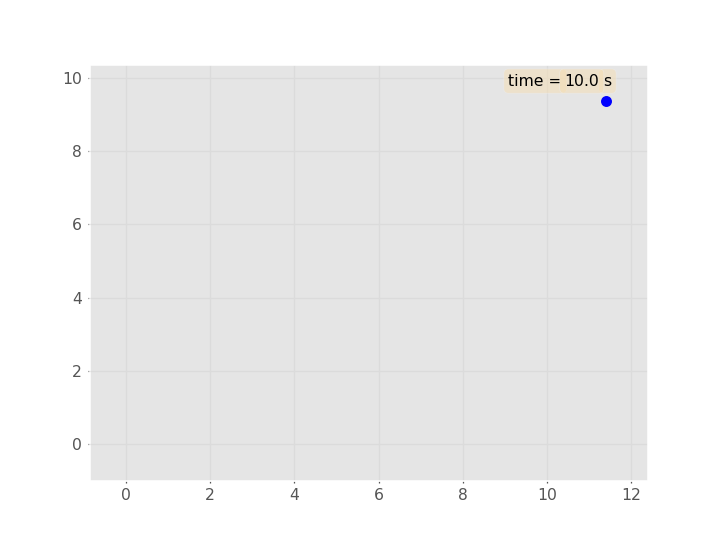

In [172]:
# The animation will work with matplotlib
# The most important variable here is p, because it contains the trayectory of our vehicle
# This code is the same, you don't need to memorize it, just know variable p is important

fig, animate, init = runanim(p)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(p)+20, interval=100, blit=False)

## __Control and Behaviour__

We can observe how is the behaviour of the bicycle over the time.
<br> Since it is a custom path, the orientation should be adecuated 
<br> every time until reach the stability
<br> It is the behaviour of a control system

In [220]:
time = np.arange(0,len(p)/10,0.1)

__Orientation Angle__

<IPython.core.display.Javascript object>


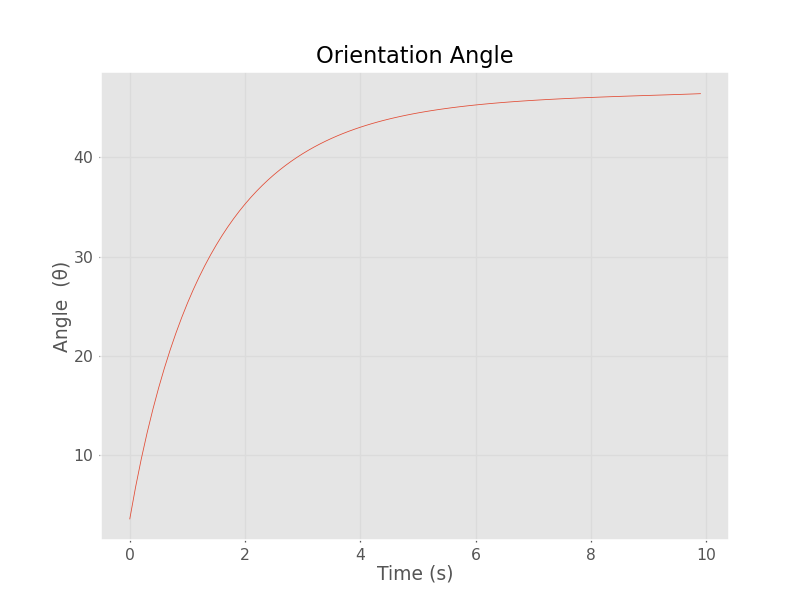

In [221]:
plt.title("Orientation Angle")
plt.xlabel("Time (s)")
plt.ylabel("Angle  (θ)")
plt.plot(time,p[:,2]*180/np.pi)

As can be seen, the orientation tends to a constant value, therefore the errors were reducted

On the other hand the velocity also changes. Let see how

In [230]:
velocs = [] #Contains the velocities [x velocity, y velocity, angular velocity]
for i in range(len(p)):
    veloz = veh2.deriv(p[i], veh2.control(veh2,t=1,x=p[i])) 
    velocs.append(veloz)


__Velocity in X__

<IPython.core.display.Javascript object>


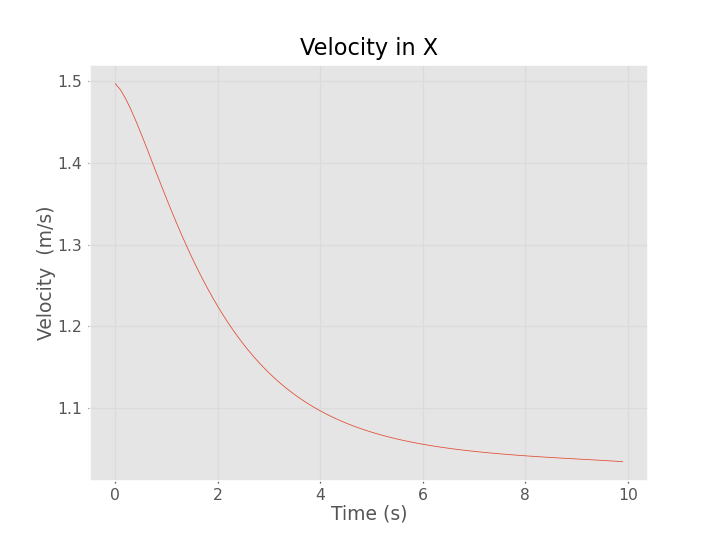

In [223]:
plt.title("Velocity in X")
plt.xlabel("Time (s)")
plt.ylabel("Velocity  (m/s)")
plt.plot(time,np.array(velocs)[:,0])

__Velocity in Y__

<IPython.core.display.Javascript object>


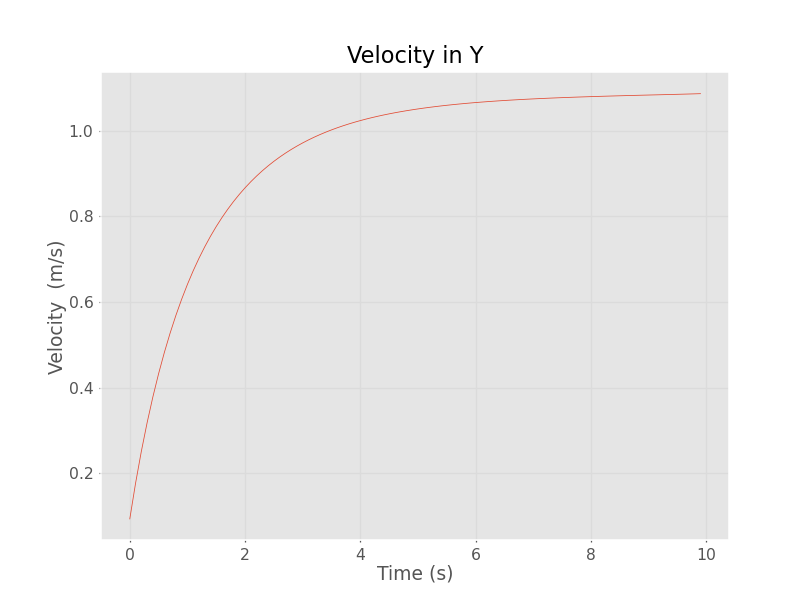

In [224]:
plt.title("Velocity in Y")
plt.xlabel("Time (s)")
plt.ylabel("Velocity  (m/s)")
plt.plot(time,np.array(velocs)[:,1])

As you can see the velocity in x is changing, as you remember the initial velocity is set to 1.5 m/s
<br> Since it is the magnitude, it can be separated in components x and y. Therefore the velocity in y
<br> should be changing too.

__Magnitude of velocity__

<IPython.core.display.Javascript object>


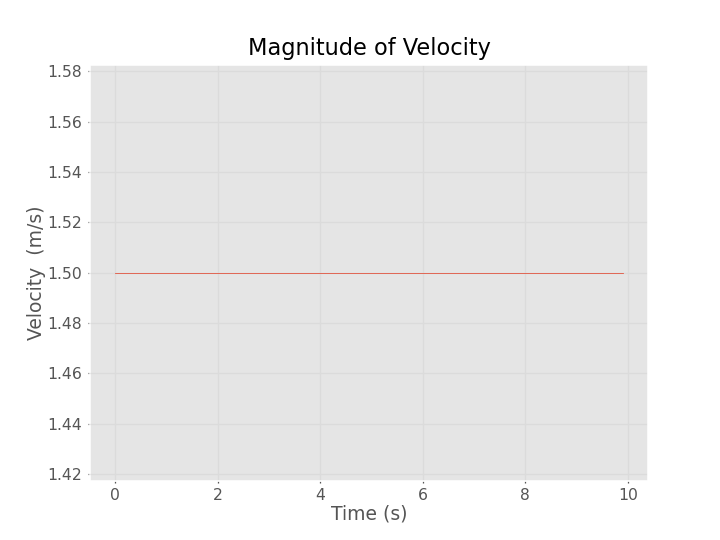

In [231]:
magnitud = np.sqrt(np.power(np.array(velocs)[:,0],2)+np.power(np.array(velocs)[:,1],2))
plt.title("Magnitude of Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity  (m/s)")
plt.plot(time,magnitud)

If we compute the magnitude of the velocity, it always remains constant as set before, 1.5 m/s

__Angular Velocity__

<IPython.core.display.Javascript object>


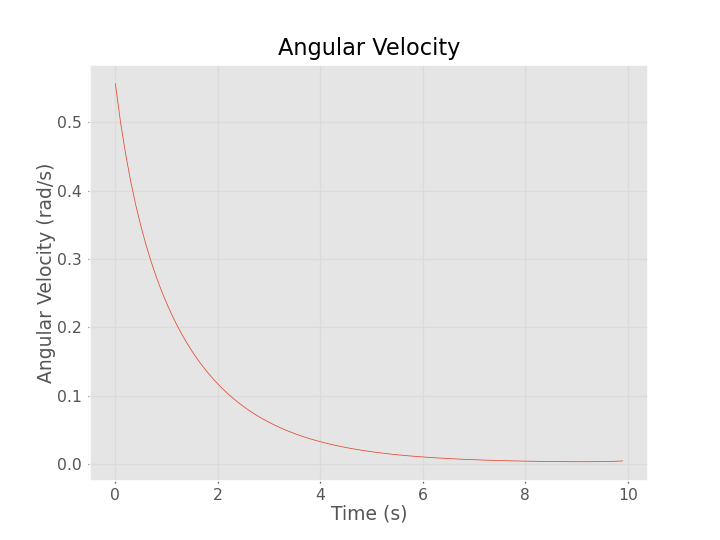

In [226]:
plt.title("Angular Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.plot(time,np.array(velocs)[:,2])

The angular velocity is also involved. As you remember in the animation, the robot tends 
<br> to reach a constant orientation, therefore when it is reached, there is no change 
<br> in its value, then the angular velocity tends to 0.

## __Exercises__